# Product Segmentation for Retail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

## Import Data & Processing

In [2]:
# import sales Data

df = pd.read_csv('sales_train_evaluation.csv')

In [3]:
df.keys()

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)

In [4]:
df.id

0        HOBBIES_1_001_CA_1_evaluation
1        HOBBIES_1_002_CA_1_evaluation
2        HOBBIES_1_003_CA_1_evaluation
3        HOBBIES_1_004_CA_1_evaluation
4        HOBBIES_1_005_CA_1_evaluation
                     ...              
30485      FOODS_3_823_WI_3_evaluation
30486      FOODS_3_824_WI_3_evaluation
30487      FOODS_3_825_WI_3_evaluation
30488      FOODS_3_826_WI_3_evaluation
30489      FOODS_3_827_WI_3_evaluation
Name: id, Length: 30490, dtype: object

In [5]:
df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

In [6]:
# from the csv file named 'sales_train_evaluation' we create our parameters

COLS_ITM = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

#we only study the first year (from day 1 to day 366)

COLS_DATE = ['d_' + str(i) for i in range(1, 366)]

# Change id to match with price dataframe (in file 'sell_prices' id is not mentioned as a feature)

df['id'] = df['store_id'] + '-' + df['item_id']

NumExpr defaulting to 4 threads.


In [7]:
df.keys()

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)

In [8]:
# Set our index

df.set_index(COLS_ITM, inplace = True)

# And the Scope of our study  = Year 1 (366 days)

df = df[COLS_DATE]

In [9]:
df.keys()

Index(['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10',
       ...
       'd_356', 'd_357', 'd_358', 'd_359', 'd_360', 'd_361', 'd_362', 'd_363',
       'd_364', 'd_365'],
      dtype='object', length=365)

In [10]:
# Import Calendar

df_calendar = pd.read_csv('calendar.csv')

# convert days to Weeks to get the sale prices

dict_week = dict(zip(df_calendar.d.values, df_calendar.wm_yr_wk.values))

In [11]:
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [12]:
dict_week

{'d_1': 11101,
 'd_2': 11101,
 'd_3': 11101,
 'd_4': 11101,
 'd_5': 11101,
 'd_6': 11101,
 'd_7': 11101,
 'd_8': 11102,
 'd_9': 11102,
 'd_10': 11102,
 'd_11': 11102,
 'd_12': 11102,
 'd_13': 11102,
 'd_14': 11102,
 'd_15': 11103,
 'd_16': 11103,
 'd_17': 11103,
 'd_18': 11103,
 'd_19': 11103,
 'd_20': 11103,
 'd_21': 11103,
 'd_22': 11104,
 'd_23': 11104,
 'd_24': 11104,
 'd_25': 11104,
 'd_26': 11104,
 'd_27': 11104,
 'd_28': 11104,
 'd_29': 11105,
 'd_30': 11105,
 'd_31': 11105,
 'd_32': 11105,
 'd_33': 11105,
 'd_34': 11105,
 'd_35': 11105,
 'd_36': 11106,
 'd_37': 11106,
 'd_38': 11106,
 'd_39': 11106,
 'd_40': 11106,
 'd_41': 11106,
 'd_42': 11106,
 'd_43': 11107,
 'd_44': 11107,
 'd_45': 11107,
 'd_46': 11107,
 'd_47': 11107,
 'd_48': 11107,
 'd_49': 11107,
 'd_50': 11108,
 'd_51': 11108,
 'd_52': 11108,
 'd_53': 11108,
 'd_54': 11108,
 'd_55': 11108,
 'd_56': 11108,
 'd_57': 11109,
 'd_58': 11109,
 'd_59': 11109,
 'd_60': 11109,
 'd_61': 11109,
 'd_62': 11109,
 'd_63': 11109,
 

In [13]:
# We'll create a pricing matrix M(n, p) with n = sku_id and p = week

# Import Pricing

df_price = pd.read_csv('sell_prices.csv')

# create a unique SKU Index

df_price['item_store_id'] = df_price['store_id'] + '-' + df_price['item_id']

df_price.head()

,store_id,item_id,wm_yr_wk,sell_price,item_store_id
0,CA_1,HOBBIES_1_001,11325,9.58,CA_1-HOBBIES_1_001
1,CA_1,HOBBIES_1_001,11326,9.58,CA_1-HOBBIES_1_001
2,CA_1,HOBBIES_1_001,11327,8.26,CA_1-HOBBIES_1_001
3,CA_1,HOBBIES_1_001,11328,8.26,CA_1-HOBBIES_1_001
4,CA_1,HOBBIES_1_001,11329,8.26,CA_1-HOBBIES_1_001


In [14]:
print("{:,} records for sales price".format(len(df_price)))

6,841,121 records for sales price


In [15]:
df_price.keys()

Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price', 'item_store_id'], dtype='object')

In [16]:
# Pricing

df_price = df_price.pivot(index='item_store_id', columns='wm_yr_wk', values='sell_price').fillna(0)

df_price.head()

wm_yr_wk,11101,11102,11103,11104,11105,11106,11107,11108,11109,11110,11111,11112,11113,11114,11115,11116,11117,11118,11119,11120,11121,11122,11123,11124,11125,11126,11127,11128,11129,11130,11131,11132,11133,11134,11135,11136,11137,11138,11139,11140,11141,11142,11143,11144,11145,11146,11147,11148,11149,11150,11151,11152,11201,11202,11203,11204,11205,11206,11207,11208,11209,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11223,11224,11225,11226,11227,11228,11229,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239,11240,11241,11242,11243,11244,11245,11246,11247,11248,11249,11250,11251,11252,11301,11302,11303,11304,11305,11306,11307,11308,11309,11310,11311,11312,11313,11314,11315,11316,11317,11318,11319,11320,11321,11322,11323,11324,11325,11326,11327,11328,11329,11330,11331,11332,11333,11334,11335,11336,11337,11338,11339,11340,11341,11342,11343,11344,11345,11346,11347,11348,11349,11350,11351,11352,11353,11401,11402,11403,11404,11405,11406,11407,11408,11409,11410,11411,11412,11413,11414,11415,11416,11417,11418,11419,11420,11421,11422,11423,11424,11425,11426,11427,11428,11429,11430,11431,11432,11433,11434,11435,11436,11437,11438,11439,11440,11441,11442,11443,11444,11445,11446,11447,11448,11449,11450,11451,11452,11501,11502,11503,11504,11505,11506,11507,11508,11509,11510,11511,11512,11513,11514,11515,11516,11517,11518,11519,11520,11521,11522,11523,11524,11525,11526,11527,11528,11529,11530,11531,11532,11533,11534,11535,11536,11537,11538,11539,11540,11541,11542,11543,11544,11545,11546,11547,11548,11549,11550,11551,11552,11601,11602,11603,11604,11605,11606,11607,11608,11609,11610,11611,11612,11613,11614,11615,11616,11617,11618,11619,11620,11621
item_store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA_1-FOODS_1_001,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24
CA_1-FOODS_1_002,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88,8.88

In [17]:
# Matrix from pivot 

matrix_price = df_price.to_numpy()

In [18]:
matrix_price

array([[ 2.  ,  2.  ,  2.  , ...,  2.24,  2.24,  2.24],
       [ 7.88,  7.88,  7.88, ...,  9.48,  9.48,  9.48],
       [ 2.88,  2.88,  2.88, ...,  3.23,  3.23,  3.23],
       ...,
       [18.47, 18.47, 18.47, ..., 19.54, 19.54, 19.54],
       [ 0.  ,  0.  ,  0.  , ...,  1.97,  1.97,  1.97],
       [ 5.94,  5.94,  5.94, ...,  5.94,  5.94,  5.94]])

In [19]:
# Dict Matrix Index

pr_n = dict(zip(df_price.index, range(len(df_price.index))))

pr_p = dict(zip(df_price.columns, range(len(df_price.columns))))

In [20]:
pr_n

{'CA_1-FOODS_1_001': 0,
 'CA_1-FOODS_1_002': 1,
 'CA_1-FOODS_1_003': 2,
 'CA_1-FOODS_1_004': 3,
 'CA_1-FOODS_1_005': 4,
 'CA_1-FOODS_1_006': 5,
 'CA_1-FOODS_1_008': 6,
 'CA_1-FOODS_1_009': 7,
 'CA_1-FOODS_1_010': 8,
 'CA_1-FOODS_1_011': 9,
 'CA_1-FOODS_1_012': 10,
 'CA_1-FOODS_1_013': 11,
 'CA_1-FOODS_1_014': 12,
 'CA_1-FOODS_1_015': 13,
 'CA_1-FOODS_1_016': 14,
 'CA_1-FOODS_1_017': 15,
 'CA_1-FOODS_1_018': 16,
 'CA_1-FOODS_1_019': 17,
 'CA_1-FOODS_1_020': 18,
 'CA_1-FOODS_1_021': 19,
 'CA_1-FOODS_1_022': 20,
 'CA_1-FOODS_1_023': 21,
 'CA_1-FOODS_1_024': 22,
 'CA_1-FOODS_1_025': 23,
 'CA_1-FOODS_1_026': 24,
 'CA_1-FOODS_1_027': 25,
 'CA_1-FOODS_1_028': 26,
 'CA_1-FOODS_1_029': 27,
 'CA_1-FOODS_1_030': 28,
 'CA_1-FOODS_1_031': 29,
 'CA_1-FOODS_1_032': 30,
 'CA_1-FOODS_1_033': 31,
 'CA_1-FOODS_1_034': 32,
 'CA_1-FOODS_1_035': 33,
 'CA_1-FOODS_1_036': 34,
 'CA_1-FOODS_1_037': 35,
 'CA_1-FOODS_1_038': 36,
 'CA_1-FOODS_1_039': 37,
 'CA_1-FOODS_1_040': 38,
 'CA_1-FOODS_1_041': 39,
 'CA_1-FOO

In [21]:
pr_p

{11101: 0,
 11102: 1,
 11103: 2,
 11104: 3,
 11105: 4,
 11106: 5,
 11107: 6,
 11108: 7,
 11109: 8,
 11110: 9,
 11111: 10,
 11112: 11,
 11113: 12,
 11114: 13,
 11115: 14,
 11116: 15,
 11117: 16,
 11118: 17,
 11119: 18,
 11120: 19,
 11121: 20,
 11122: 21,
 11123: 22,
 11124: 23,
 11125: 24,
 11126: 25,
 11127: 26,
 11128: 27,
 11129: 28,
 11130: 29,
 11131: 30,
 11132: 31,
 11133: 32,
 11134: 33,
 11135: 34,
 11136: 35,
 11137: 36,
 11138: 37,
 11139: 38,
 11140: 39,
 11141: 40,
 11142: 41,
 11143: 42,
 11144: 43,
 11145: 44,
 11146: 45,
 11147: 46,
 11148: 47,
 11149: 48,
 11150: 49,
 11151: 50,
 11152: 51,
 11201: 52,
 11202: 53,
 11203: 54,
 11204: 55,
 11205: 56,
 11206: 57,
 11207: 58,
 11208: 59,
 11209: 60,
 11210: 61,
 11211: 62,
 11212: 63,
 11213: 64,
 11214: 65,
 11215: 66,
 11216: 67,
 11217: 68,
 11218: 69,
 11219: 70,
 11220: 71,
 11221: 72,
 11222: 73,
 11223: 74,
 11224: 75,
 11225: 76,
 11226: 77,
 11227: 78,
 11228: 79,
 11229: 80,
 11230: 81,
 11231: 82,
 11232: 83,
 1

In [22]:
print("{:,} records for sales price pivot".format(len(df_price)))

30,490 records for sales price pivot


## Statistical Analysis

In [23]:
# we calculate the Sales Mean during the first 366 days

df['mean'] = df[COLS_DATE].mean(axis = 1)

# Standard Deviation

df['std'] = df[COLS_DATE].std(axis = 1)

# We remove items not sold during the first year

print("{:,} records for the full scope".format(len(df)))

df = df[df['mean']>0]

print("{:,} records for after filter".format(len(df)))

df.reset_index(inplace = True)

# We verifie that the line with product with zero sales in year 1 if they are deleted or not yet + Mean and standard dev columns

df.head()

30,490 records for the full scope
17,055 records for after filter


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,mean,std
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,2,0,0,0,2,0,0,3,1,1,0,1,4,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0.175342,0.459270
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,2,0,1,0,0,1,1,1,0,2,3,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,2,3,0,2,0,0,2,2,0,0,2,1,2,1,1,1,2,0,0,1,0,1,3,1,0,0,0,0,3,5,2,2,1,1,1,1,1,1,0,0,2,1,1,1,2,0,0,0,2,5,6,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,1,0,2,0,0,5,1,0,0,1,3,1,3,5,1,3,0,3,4,4,0,0,1,3,1,4,0,0,2,0,2,0,1,4,2,1,0,2,1,3,6,1,1,2,1,2,3,1,2,0,0,0,3,4,5,1,0,0,1,0,1,4,6,3,1,1,0,1,4,5,1,1,4,0,0,0,1,2,2,1,1,6,2,4,4,0,0,0,2,2,0,1,1,3,1,2,4,2,1,3,2,2,0,4,1,1,0,4,2,2,5,1,2,3,3,2,2,1,1,2,1,3,2,1,3,0,0,0,3,1,2,3,0,1,0,2,0,5,4,2,1,2,4,1,1,0,1,2,2,2,0,2,3,0,1,1,1,1,0,5,1,1,1,2,0,4,2,3,2,0,2,1,1,6,3,1,3,2,2,1,2,0,0,0,0,3,1,0,6,2,1,2,1,0,0,0,0,0,0,6,3,3,0,0,0,0,2,2,0,4,2,1,0,1,1,8,1,3,0,1,2,3,1.282192,1.504512
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Turnover, Sales Units

#### Turnover = Price x Volume

#### Product turnover, or inventory turnover, is a measurement of the speed a company sells the products or its inventory that she has on hand

In [24]:
# let's calculate the Total Units

df['units'] = df[COLS_DATE].sum(axis = 1)

# Turnover = Units x Price

df['TO'] = 0 

for col in COLS_DATE:
    df['TO'] = df['TO'] + df[col] * df[['id', col]].apply(
        lambda t: matrix_price[pr_n[t['id']], pr_p[dict_week[col]]], axis = 1)
    
# We verify our updated columns

df.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,mean,std,units,TO
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,2,0,0,0,2,0,0,3,1,1,0,1,4,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0.175342,0.459270,64,254.08
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,2,0,1,0,0,1,1,1,0,2,3,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,2,3,0,2,0,0,2,2,0,0,2,1,2,1,1,1,2,0,0,1,0,1,3,1,0,0,0,0,3,5,2,2,1,1,1,1,1,1,0,0,2,1,1,1,2,0,0,0,2,5,6,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,1,0,2,0,0,5,1,0,0,1,3,1,3,5,1,3,0,3,4,4,0,0,1,3,1,4,0,0,2,0,2,0,1,4,2,1,0,2,1,3,6,1,1,2,1,2,3,1,2,0,0,0,3,4,5,1,0,0,1,0,1,4,6,3,1,1,0,1,4,5,1,1,4,0,0,0,1,2,2,1,1,6,2,4,4,0,0,0,2,2,0,1,1,3,1,2,4,2,1,3,2,2,0,4,1,1,0,4,2,2,5,1,2,3,3,2,2,1,1,2,1,3,2,1,3,0,0,0,3,1,2,3,0,1,0,2,0,5,4,2,1,2,4,1,1,0,1,2,2,2,0,2,3,0,1,1,1,1,0,5,1,1,1,2,0,4,2,3,2,0,2,1,1,6,3,1,3,2,2,1,2,0,0,0,0,3,1,0,6,2,1,2,1,0,0,0,0,0,0,6,3,3,0,0,0,0,2,2,0,4,2,1,0,1,1,8,1,3,0,1,2,3,1.282192,1.504512,468,2031.12
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Coefficient of Variation


#### CV = sigma / mu = Standard deviation / Mean

In [25]:
df['CV'] = df['std']/df['mean']

df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,mean,std,units,TO,CV
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,2,0,0,0,2,0,0,3,1,1,0,1,4,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0.175342,0.459270,64,254.08,2.619273
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,2,0,1,0,0,1,1,1,0,2,3,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,2,3,0,2,0,0,2,2,0,0,2,1,2,1,1,1,2,0,0,1,0,1,3,1,0,0,0,0,3,5,2,2,1,1,1,1,1,1,0,0,2,1,1,1,2,0,0,0,2,5,6,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,1,0,2,0,0,5,1,0,0,1,3,1,3,5,1,3,0,3,4,4,0,0,1,3,1,4,0,0,2,0,2,0,1,4,2,1,0,2,1,3,6,1,1,2,1,2,3,1,2,0,0,0,3,4,5,1,0,0,1,0,1,4,6,3,1,1,0,1,4,5,1,1,4,0,0,0,1,2,2,1,1,6,2,4,4,0,0,0,2,2,0,1,1,3,1,2,4,2,1,3,2,2,0,4,1,1,0,4,2,2,5,1,2,3,3,2,2,1,1,2,1,3,2,1,3,0,0,0,3,1,2,3,0,1,0,2,0,5,4,2,1,2,4,1,1,0,1,2,2,2,0,2,3,0,1,1,1,1,0,5,1,1,1,2,0,4,2,3,2,0,2,1,1,6,3,1,3,2,2,1,2,0,0,0,0,3,1,0,6,2,1,2,1,0,0,0,0,0,0,6,3,3,0,0,0,0,2,2,0,4,2,1,0,1,1,8,1,3,0,1,2,3,1.282192,1.504512,468,2031.12,1.173391
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Segmentation

#### ABC Analysis + Demand Variability

In [26]:
# create a copy of our data frame where we focus only on 1 category (Hobbies)

df_abc = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()

df_abc = df_abc.groupby(['item_id', 'dept_id', 'cat_id']).sum()

In [27]:
df_abc.head()

,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,units,TO
item_id,dept_id,cat_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,2,4,2,5,3,1,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,4,5,2,3,2,4,4,9,2,2,5,5,3,0,4,2,0,5,5,2,0,6,1,0,3,3,0,3,4,5,0,2,4,1,2,2,0,2,2,2,2,2,2,0,5,3,1,9,2,0,4,0,5,4,2,4,3,1,3,4,1,1,1,1,1,1,3,4,2,5,3,3,4,4,2,1,3,2,2,1,5,3,4,4,0,1,1,1,2,6,0,1,6,3,5,5,6,1,3,2,5,8,6,3,0,3,0,1,2,2,4,6,5,2,3,5,2,7,1,4,4,2,2,3,4,2,0,3,4,10,2,3,1,5,3,6,3,2,2,1,2,1,4,7,3,5,1,1,0,2,3,3,5,3,1,1,4,3,6,6,6,0,3,5,7,1,6,7,5,4,10,7,8,2,8,6,6,6,6,14,10,13,10,14,19,22,24,0,9,5,2,3,1,1,2,3,0,3,4,2,3,2,3,1,0,1,1,5,3,0,3,0,2,3,2,3,0,1,3,3,1,6,806,3199.82
HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,17,23,16,12,7,21,15,11,20,10,10,8,9,14,23,18,0,7,11,8,10,23,30,13,13,4,3,15,19,15,15,7,21,15,16,16,19,12,13,7,13,17,11,28,15,14,15,7,12,18,20,4,10,9,14,10,25,22,10,6,6,15,15,22,19,11,13,7,25,19,27,31,12,14,10,14,19,13,23,19,11,21,15,15,21,28,14,16,14,13,27,12,17,23,30,13,18,23,38,26,30,14,14,13,29,18,35,13,11,21,26,28,11,36,23,17,21,14,23,28,34,20,19,17,24,16,29,37,21,11,18,21,18,20,18,14,12,27,37,26,18,41,20,21,24,16,22,37,25,16,30,15,24,27,19,14,13,9,14,17,26,25,49,21,18,17,20,10,9,23,20,30,14,22,19,28,23,19,10,22,14,15,13,22,22,23,16,15,22,22,21,18,20,20,11,10,16,21,27,17,15,18,11,13,8,12,16,9,15,5,6,11,16,11,20,20,11,23,20,20,21,21,5,7,40,31,11,19,16,14,13,21,17,15,16,

In [28]:
# Calculate mean - standard deviation - CV

# Mean

df_abc['mean'] = df_abc[COLS_DATE].mean(axis = 1)

# Filter out the reference withou sales

df_abc = df_abc[df_abc['mean']>0]

# Standard

df_abc['std'] = df_abc[COLS_DATE].std(axis = 1)

# Coefficient of Variation

df_abc['CV'] = df_abc['std']/df_abc['mean']

df_abc.reset_index(inplace = True)

In [52]:
df_abc.head()

,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121,1.0,0.315457,A
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249,2.0,0.630915,A
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264,3.0,0.946372,A
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470,4.0,1.261830,A
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622,5.0,1.577287,A


In [30]:
# Normalility Test through Shapiro-wilks test

df_abc['Normality_p'] = df_abc[COLS_DATE].apply(lambda row : stats.shapiro(row)[1], axis = 1)
alpha = 0.001
df_abc['Not_Normal'] = df_abc['Normality_p'] < alpha

In [31]:
df_abc.head()

,item_id,dept_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,units,TO,mean,std,CV,Normality_p,Not_Normal
0,HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,2,4,2,5,3,1,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,4,5,2,3,2,4,4,9,2,2,5,5,3,0,4,2,0,5,5,2,0,6,1,0,3,3,0,3,4,5,0,2,4,1,2,2,0,2,2,2,2,2,2,0,5,3,1,9,2,0,4,0,5,4,2,4,3,1,3,4,1,1,1,1,1,1,3,4,2,5,3,3,4,4,2,1,3,2,2,1,5,3,4,4,0,1,1,1,2,6,0,1,6,3,5,5,6,1,3,2,5,8,6,3,0,3,0,1,2,2,4,6,5,2,3,5,2,7,1,4,4,2,2,3,4,2,0,3,4,10,2,3,1,5,3,6,3,2,2,1,2,1,4,7,3,5,1,1,0,2,3,3,5,3,1,1,4,3,6,6,6,0,3,5,7,1,6,7,5,4,10,7,8,2,8,6,6,6,6,14,10,13,10,14,19,22,24,0,9,5,2,3,1,1,2,3,0,3,4,2,3,2,3,1,0,1,1,5,3,0,3,0,2,3,2,3,0,1,3,3,1,6,806,3199.82,2.208219,3.087628,1.398244,6.009899e-25,True
1,HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,17,23,16,12,7,21,15,11,20,10,10,8,9,14,23,18,0,7,11,8,10,23,30,13,13,4,3,15,19,15,15,7,21,15,16,16,19,12,13,7,13,17,11,28,15,14,15,7,12,18,20,4,10,9,14,10,25,22,10,6,6,15,15,22,19,11,13,7,25,19,27,31,12,14,10,14,19,13,23,19,11,21,15,15,21,28,14,16,14,13,27,12,17,23,30,13,18,23,38,26,30,14,14,13,29,18,35,13,11,21,26,28,11,36,23,17,21,14,23,28,34,20,19,17,24,16,29,37,21,11,18,21,18,20,18,14,12,27,37,26,18,41,20,21,24,16,22,37,25,16,30,15,24,27,19,14,13,9,14,17,26,25,49,21,18,17,20,10,9,23,20,30,14,22,19,28,23,19,10,22,14,15,13,22,22,23,16,15,22,22,21,18,20,20,11,10,16,21,27,17,15,18,11,13,8,12,16,9,15,5,6,11,16,11,20,20,11,23,20,20,21,21,5,7,40,31,11,19,16,14,13,21,17,15,16,22,17,31,25,20,10,18,10,15,13,23,24,12,14,20,17,16,22,22,16,22,19,14,14,12,19,18,7,24,20,16,14,11,26,12,24,13,14,25,32,16,15,29,20,18,17,14,21,14,19,14,23,20,23,8,13,21,9,20,10,23,18,14,15,29,22,11,33,17,16,8,29,15,19,23,19,23,21,8,16,25,18,9,20,22,18,19,4,0,35,22,13,16,11,17,12,31,20

In [68]:
# if you want to find a specific item base on its id : 

hobbies_index = df_abc[df_abc["item_id"].str.contains("HOBBIES_1_323",  na=False)]
hobbies_index

,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC
9,HOBBIES_1_323,HOBBIES_1,HOBBIES,8270,40822.6,22.657534,6.291498,0.277678,0.021935,False,1.424885,17.325631,10.0,3.154574,A


In [32]:
# ABC SKU-LEVEL

df_abc = df_abc.drop(COLS_DATE, axis =1).copy()
df_abc['TO%'] = 100*(df_abc['TO']/(df_abc['TO'].sum()))

# Sort 

df_abc.sort_values(['TO%'], ascending = False, inplace = True, ignore_index=True)
df_abc['TO%_CS'] = df_abc['TO%'].cumsum() #cumulated sum

# A, B, C on SKU Number

n_sku = len(df_abc)
n_a, n_b = int(0.05*n_sku), int(0.5*n_sku)
df_abc['SKU_ID'] = pd.Series(range(1, len(df_abc))).astype(int)
df_abc['SKU_%'] = (100 * pd.Series(range(1, len(df_abc))) / len(df_abc))
df_abc['ABC'] = pd.Series(range(len(df_abc))).apply(lambda t: 'A' if t <= n_a-1 else 'B' if t <= n_b-1 else 'C')

# A, B, C on turnover

to_a, to_b = df_abc[df_abc['SKU_ID']==n_a]['TO%'].max(), df_abc[df_abc['SKU_ID']==n_b]['TO%'].max()

print("{:,} unique SKU".format(len(df_abc)))

df_abc.head()

317 unique SKU


,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121,1.0,0.315457,A
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249,2.0,0.630915,A
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264,3.0,0.946372,A
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470,4.0,1.261830,A
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622,5.0,1.577287,A


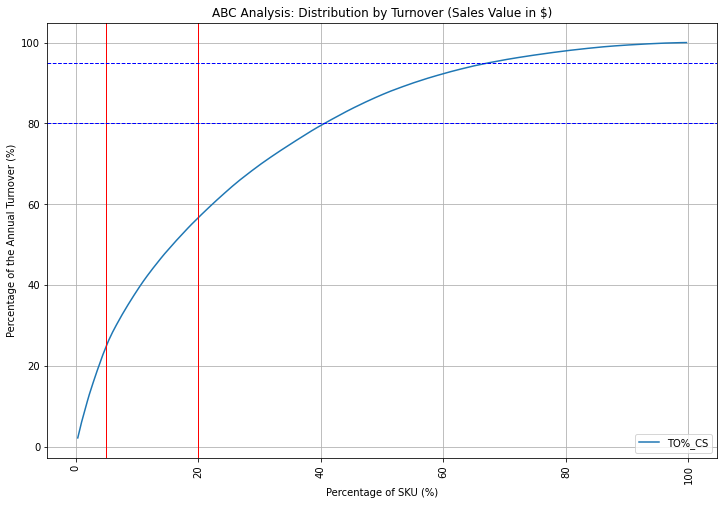

In [33]:
# Distribution by Value

ax = plt.gca()
df_abc.plot(figsize=(12, 8), x='SKU_%', y='TO%_CS', ax =ax, grid = True)

# ABC

# 20%, 50% of SKU Number (2 Vertical lines)

ax.axvline(5 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="red", linestyle="-", linewidth = 1.0)

# 20%, 50% of SKU Number (2 Horizental lines)

ax.axhline(80 , color="blue", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="blue", linestyle="--", linewidth = 1.0)

plt.xlabel('Percentage of SKU (%)')
plt.xticks(rotation=90)
plt.ylabel('Percentage of the Annual Turnover (%)')

plt.title('ABC Analysis: Distribution by Turnover (Sales Value in $)')

plt.show()

### Segmentation by Demand Variability (aka Coefficient of variation)

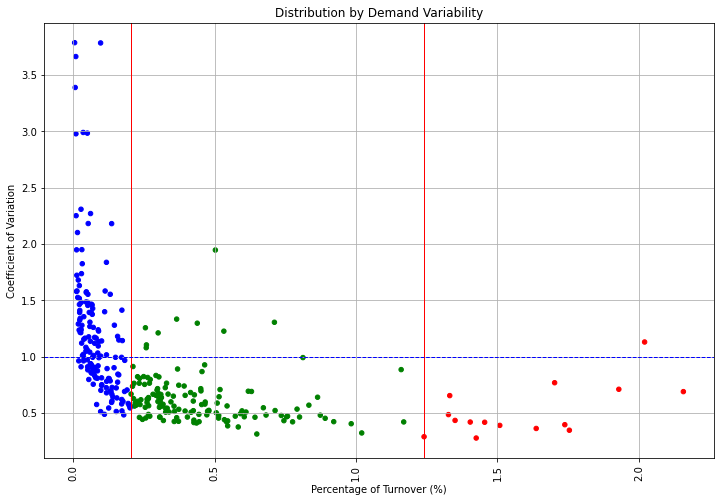

In [34]:
# Bar Chart

ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}

# Remove Outliers

df_plot = df_abc[df_abc['CV']<4].copy()
df_plot.plot.scatter(figsize=(12, 8), x='TO%', y='CV', color=df_plot['ABC'].map(colors), ax =ax, grid = True)

# ABC
# A, B and C

ax.axvline(to_a , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(to_b , color="red", linestyle="-", linewidth = 1.0)

# 20%, 50% of SKU Number

ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)

plt.xlabel('Percentage of Turnover (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')

plt.title('Distribution by Demand Variability')

plt.show()

### Normality Test

##### Does the distribution of our sales follows a normal distribution ?

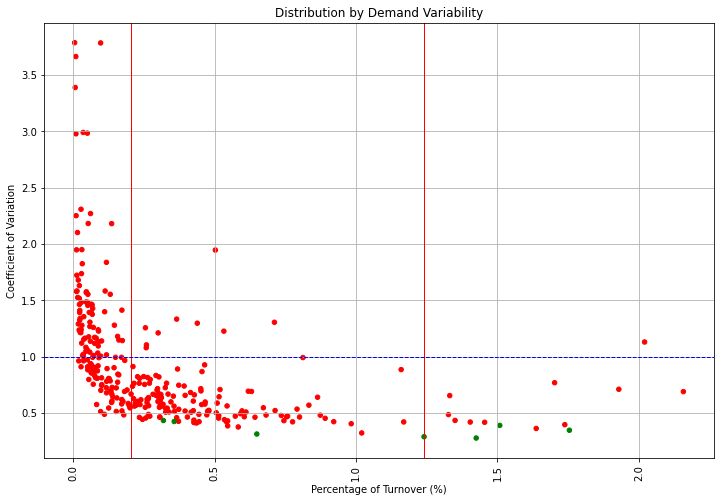

In [35]:
# Bar Chart

ax = plt.gca()
colors = {False:'green', True:'red'}

# Remove Outliers

df_plot = df_abc[df_abc['CV']<4].copy()
df_plot.plot.scatter(figsize=(12, 8), x='TO%', y='CV', color=df_plot['Not_Normal'].map(colors), ax =ax, grid = True)

# ABC
# A, B and C

ax.axvline(to_a , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(to_b , color="red", linestyle="-", linewidth = 1.0)

# 20%, 50% of SKU Number

ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)

plt.xlabel('Percentage of Turnover (%)')
plt.xticks(rotation=90)

plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability')

plt.show()

###### few items follows a Normal distribution. Just 7 items out of 317

In [63]:
df_abc['Not_Normal'].value_counts()

True     310
False      7
Name: Not_Normal, dtype: int64